In [1]:
library(Seurat)
ctrl.data <- read.table("/projects/ps-yeolab4/t_cell_p01/home/bay001/rawdata/immune_control_expression_matrix.txt.gz", 
    sep = "\t")
stim.data <- read.table("/projects/ps-yeolab4/t_cell_p01/home/bay001/rawdata/immune_stimulated_expression_matrix.txt.gz", 
    sep = "\t")

# Set up control object
ctrl <- CreateSeuratObject(raw.data = ctrl.data, project = "IMMUNE_CTRL", min.cells = 5)
ctrl@meta.data$stim <- "CTRL"
ctrl <- FilterCells(ctrl, subset.names = "nGene", low.thresholds = 500, high.thresholds = Inf)
ctrl <- NormalizeData(ctrl)
ctrl <- ScaleData(ctrl, display.progress = F)
# Set up stimulated object
stim <- CreateSeuratObject(raw.data = stim.data, project = "IMMUNE_STIM", min.cells = 5)
stim@meta.data$stim <- "STIM"
stim <- FilterCells(stim, subset.names = "nGene", low.thresholds = 500, high.thresholds = Inf)
stim <- NormalizeData(stim)
stim <- ScaleData(stim, display.progress = F)

# Gene selection for input to CCA
ctrl <- FindVariableGenes(ctrl, do.plot = F)
stim <- FindVariableGenes(stim, do.plot = F)
g.1 <- head(rownames(ctrl@hvg.info), 1000)
g.2 <- head(rownames(stim@hvg.info), 1000)
genes.use <- unique(c(g.1, g.2))
genes.use <- intersect(genes.use, rownames(ctrl@scale.data))
genes.use <- intersect(genes.use, rownames(stim@scale.data))

Loading required package: ggplot2
Loading required package: cowplot

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

Loading required package: Matrix


In [2]:
immune.combined <- RunCCA(ctrl, stim, genes.use = genes.use, num.cc = 30)

Scaling data matrix


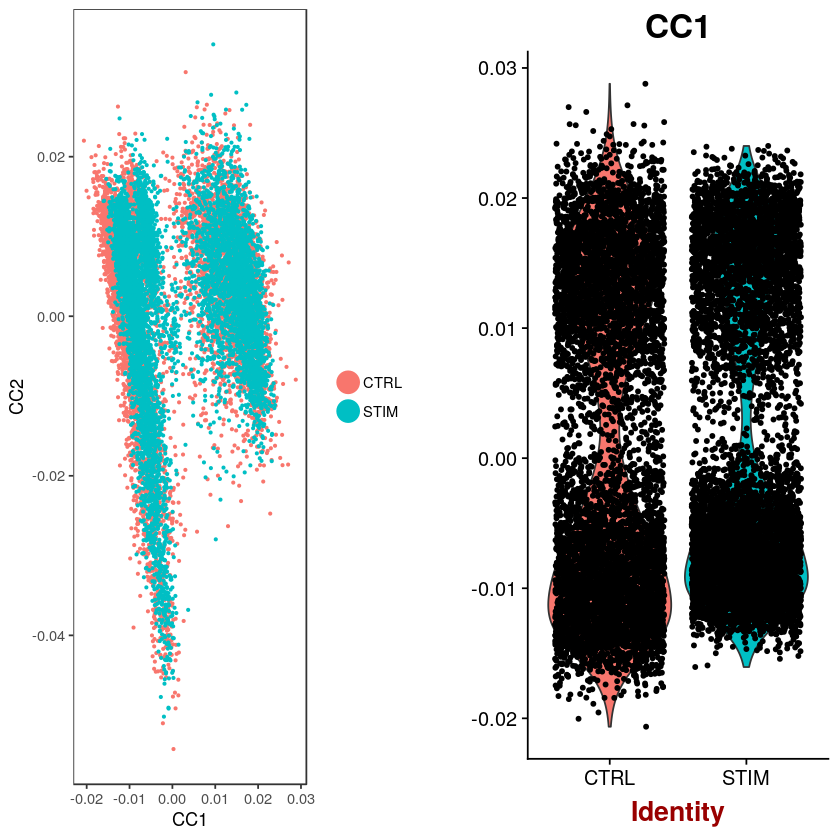

In [3]:
# visualize results of CCA plot CC1 versus CC2 and look at a violin plot
p1 <- DimPlot(object = immune.combined, reduction.use = "cca", group.by = "stim", 
    pt.size = 0.5, do.return = TRUE)
p2 <- VlnPlot(object = immune.combined, features.plot = "CC1", group.by = "stim", 
    do.return = TRUE)
plot_grid(p1, p2)

In [4]:
PrintDim(object = immune.combined, reduction.type = "cca", dims.print = 1:2, 
    genes.print = 10)

[1] "CC1"
 [1] "RPS6"   "RPS18"  "RPL21"  "RPL13"  "RPL13A" "RPS14"  "RPL3"   "RPS3"  
 [9] "RPS2"   "RPL32" 
[1] ""
 [1] "TYROBP"   "FCER1G"   "C15orf48" "SOD2"     "FTL"      "ANXA5"   
 [7] "CST3"     "CD63"     "TIMP1"    "TYMP"    
[1] ""
[1] ""
[1] "CC2"
 [1] "NKG7"  "GNLY"  "GZMB"  "CCL5"  "PRF1"  "CST7"  "KLRD1" "GZMH"  "CLIC3"
[10] "GZMA" 
[1] ""
 [1] "RPS9"    "RPL8"    "HLA-DRA" "RPS23"   "RPL11"   "RPS8"    "RPL18A" 
 [8] "RPL32"   "RPL12"   "RPL26"  
[1] ""
[1] ""


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


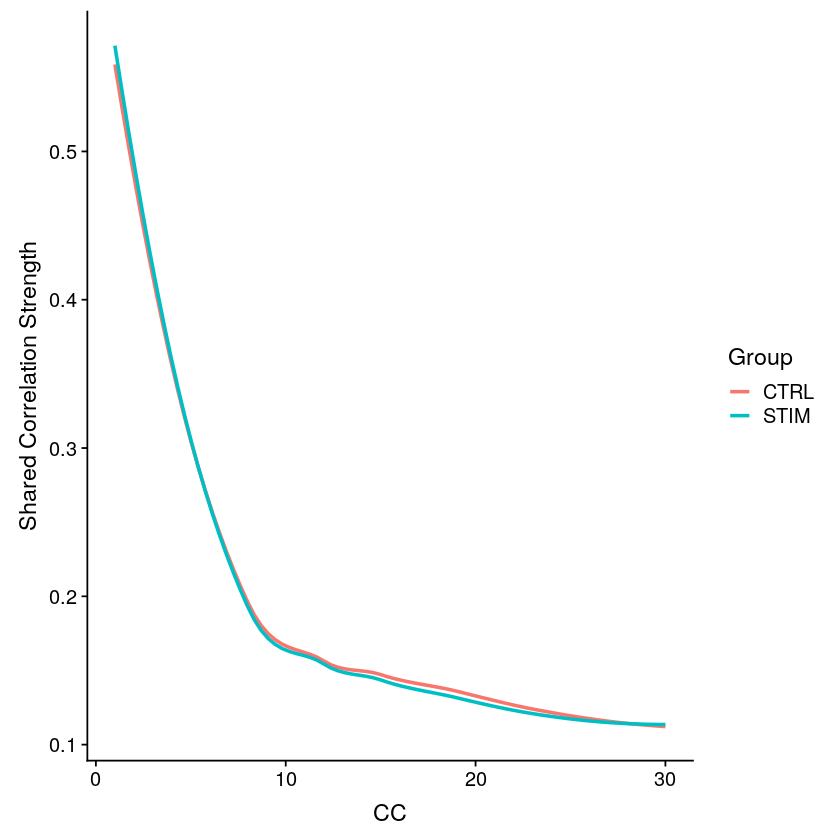

In [5]:
p3 <- MetageneBicorPlot(immune.combined, grouping.var = "stim", dims.eval = 1:30, 
    display.progress = FALSE)

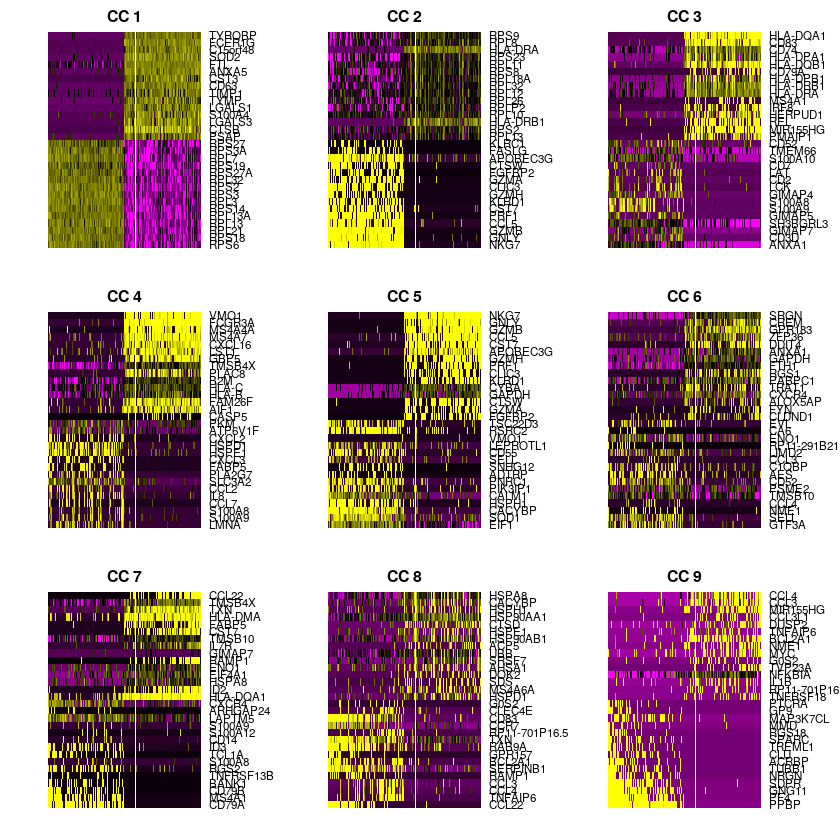

In [6]:
DimHeatmap(object = immune.combined, reduction.type = "cca", cells.use = 500, 
    dim.use = 1:9, do.balanced = TRUE)

In [7]:
immune.combined <- AlignSubspace(immune.combined, reduction.type = "cca", grouping.var = "stim", 
    dims.align = 1:20)

Scaling data matrix
Scaling data matrix


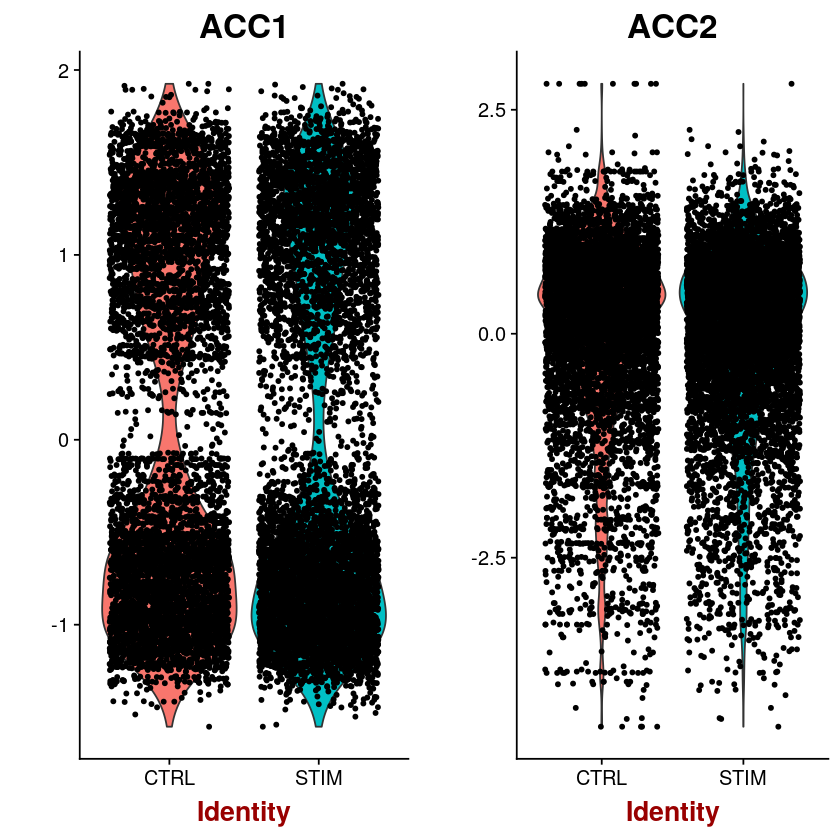

In [8]:
p1 <- VlnPlot(object = immune.combined, features.plot = "ACC1", group.by = "stim", 
    do.return = TRUE)
p2 <- VlnPlot(object = immune.combined, features.plot = "ACC2", group.by = "stim", 
    do.return = TRUE)
plot_grid(p1, p2)

In [9]:
# t-SNE and Clustering
immune.combined <- RunTSNE(immune.combined, reduction.use = "cca.aligned", dims.use = 1:20, 
    do.fast = T)
immune.combined <- FindClusters(immune.combined, reduction.type = "cca.aligned", 
    resolution = 0.6, dims.use = 1:20)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14039
Number of edges: 812080

Running Louvain algorithm...
Random start: 1
Iteration: 1
Modularity: 0.8753
Iteration: 2
Modularity: 0.8767
Iteration: 3
Modularity: 0.8767

Random start: 2
Iteration: 1
Modularity: 0.8767
Iteration: 2
Modularity: 0.8777
Iteration: 3
Modularity: 0.8777

Random start: 3
Iteration: 1
Modularity: 0.8758
Iteration: 2
Modularity: 0.8783
Iteration: 3
Modularity: 0.8783

Random start: 4
Iteration: 1
Modularity: 0.8772
Iteration: 2
Modularity: 0.8782
Iteration: 3
Modularity: 0.8782

Random start: 5
Iteration: 1
Modularity: 0.8767
Iteration: 2
Modularity: 0.8783
Iteration: 3
Modularity: 0.8783

Random start: 6
Iteration: 1
Modularity: 0.8768
Iteration: 2
Modularity: 0.8783
Iteration: 3
Modularity: 0.8783

Random start: 7
Iteration: 1
Modularity: 0.8767
Iteration: 2
Modularity: 0.8777
Iteration: 3
Modularity: 0.8777

Random start: 8
Iteration: 1
Modularity: 0.8767
Iteration: 

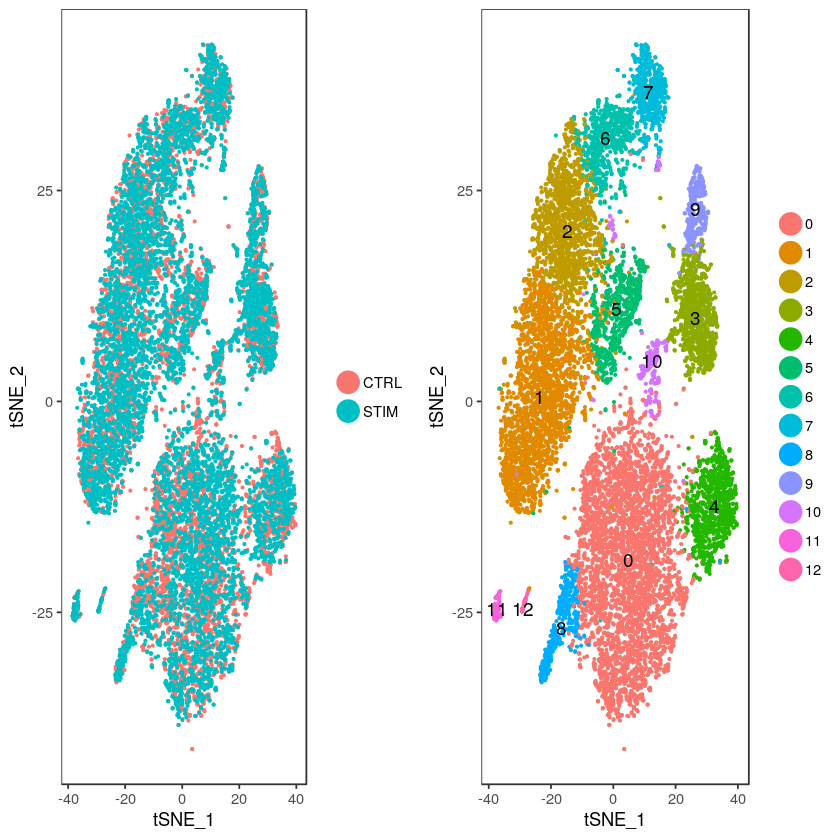

In [10]:
# Visualization
p1 <- TSNEPlot(immune.combined, do.return = T, pt.size = 0.5, group.by = "stim")
p2 <- TSNEPlot(immune.combined, do.label = T, do.return = T, pt.size = 0.5)
plot_grid(p1, p2)

In [11]:
nk.markers <- FindConservedMarkers(immune.combined, ident.1 = 7, grouping.var = "stim", 
    print.bar = FALSE)
head(nk.markers)

Warning message in if (!ident.use.2 %in% object@ident) {:
“the condition has length > 1 and only the first element will be used”Warning message in if (!ident.use.2 %in% object@ident) {:
“the condition has length > 1 and only the first element will be used”

,CTRL_p_val,CTRL_avg_logFC,CTRL_pct.1,CTRL_pct.2,CTRL_p_val_adj,STIM_p_val,STIM_avg_logFC,STIM_pct.1,STIM_pct.2,STIM_p_val_adj,max_pval,minimump_p_val
GNLY,0,4.133571,0.943,0.043,0,0.000000e+00,4.038535,0.947,0.058,0.000000e+00,0.000000e+00,0
NKG7,0,3.173254,0.956,0.082,0,0.000000e+00,2.887760,0.962,0.078,0.000000e+00,0.000000e+00,0
GZMB,0,2.895198,0.839,0.042,0,0.000000e+00,3.099659,0.900,0.058,0.000000e+00,0.000000e+00,0
CLIC3,0,2.395846,0.599,0.023,0,0.000000e+00,2.390148,0.599,0.030,0.000000e+00,0.000000e+00,0
FGFBP2,0,2.188426,0.489,0.020,0,3.011405e-179,1.529422,0.265,0.015,4.231927e-175,3.011405e-179,0
CTSW,0,2.062551,0.533,0.029,0,0.000000e+00,2.128506,0.572,0.035,0.000000e+00,0.000000e+00,0


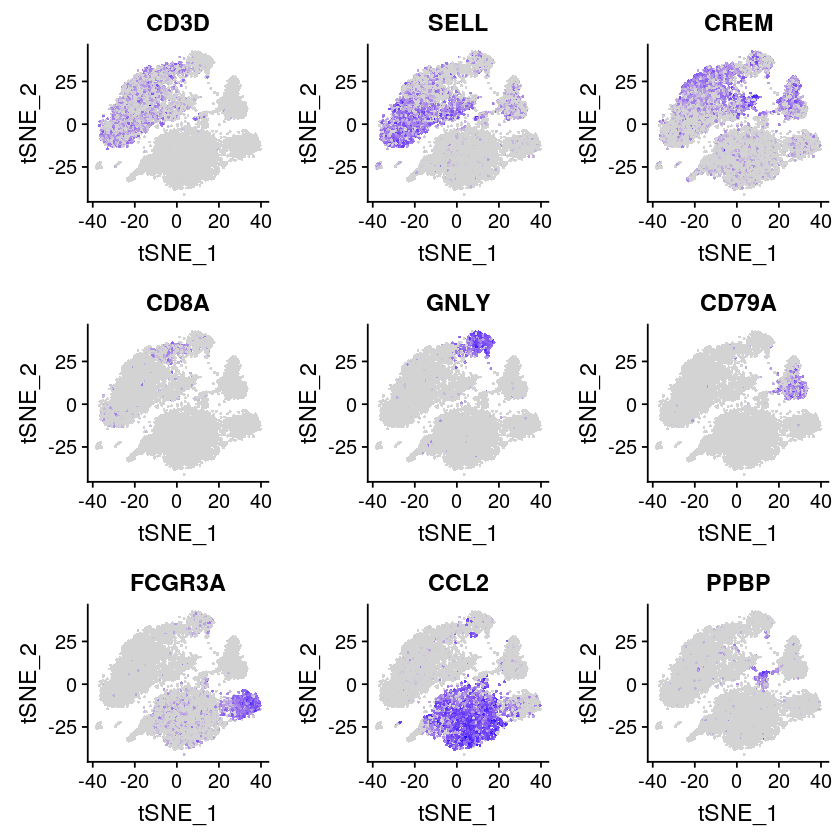

In [12]:
FeaturePlot(object = immune.combined, features.plot = c("CD3D", "SELL", "CREM", 
    "CD8A", "GNLY", "CD79A", "FCGR3A", "CCL2", "PPBP"), min.cutoff = "q9", cols.use = c("lightgrey", 
    "blue"), pt.size = 0.5)

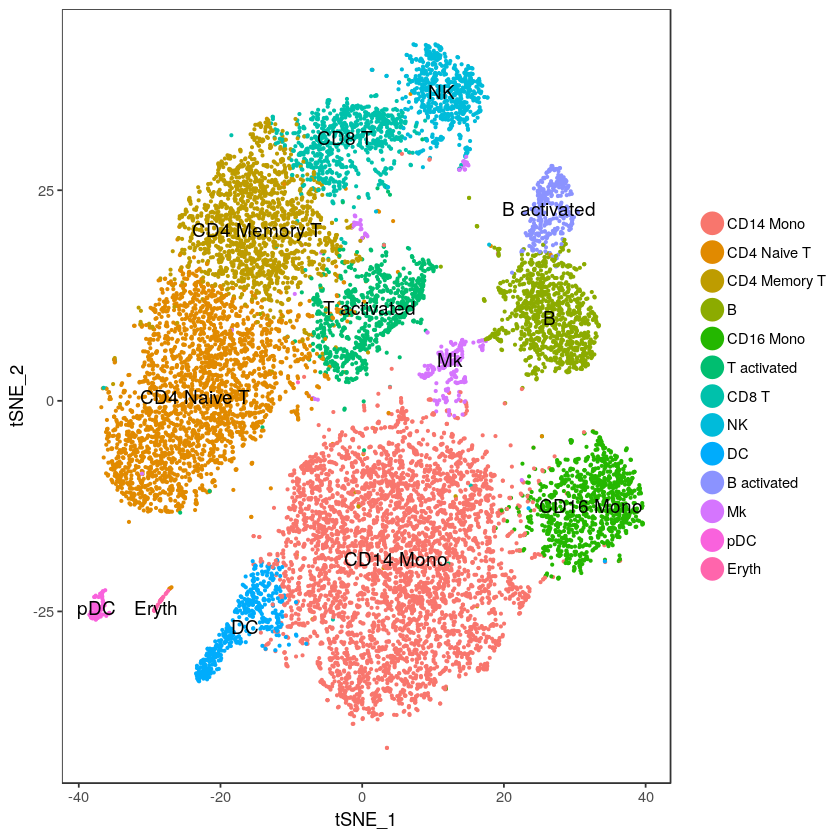

In [13]:
new.ident <- c("CD14 Mono", "CD4 Naive T", "CD4 Memory T", "B", "CD16 Mono", 
    "T activated", "CD8 T", "NK", "DC", "B activated", "Mk", "pDC", "Eryth")
for (i in 0:12) {
    immune.combined <- RenameIdent(object = immune.combined, old.ident.name = i, 
        new.ident.name = new.ident[i + 1])
}

TSNEPlot(immune.combined, do.label = T, pt.size = 0.5)

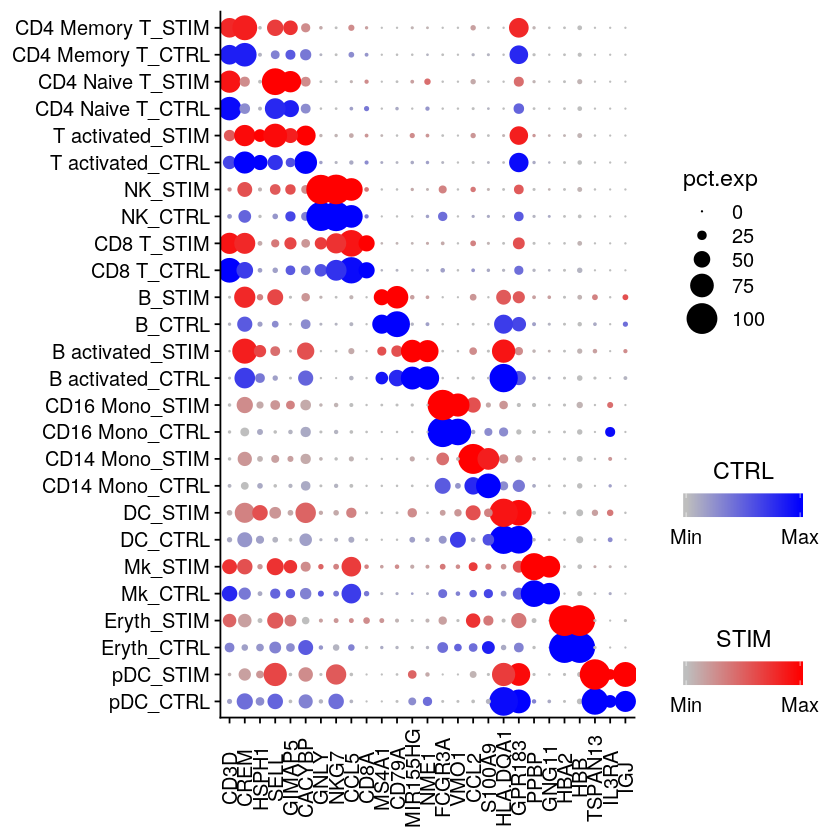

In [14]:
immune.combined@ident <- factor(immune.combined@ident, levels = (c("pDC", "Eryth", 
    "Mk", "DC", "CD14 Mono", "CD16 Mono", "B activated", "B", "CD8 T", "NK", 
    "T activated", "CD4 Naive T", "CD4 Memory T")))
markers.to.plot <- c("CD3D", "CREM", "HSPH1", "SELL", "GIMAP5", "CACYBP", "GNLY", 
    "NKG7", "CCL5", "CD8A", "MS4A1", "CD79A", "MIR155HG", "NME1", "FCGR3A", 
    "VMO1", "CCL2", "S100A9", "HLA-DQA1", "GPR183", "PPBP", "GNG11", "HBA2", 
    "HBB", "TSPAN13", "IL3RA", "IGJ")
sdp <- SplitDotPlotGG(immune.combined, genes.plot = rev(markers.to.plot), cols.use = c("blue", 
    "red"), x.lab.rot = T, plot.legend = T, dot.scale = 8, do.return = T, grouping.var = "stim")

In [15]:
LabelPoint <- function(plot, genes, exp.mat, adj.x.t = 0, adj.y.t = 0, adj.x.s = 0, 
    adj.y.s = 0, text.size = 2.5, segment.size = 0.1) {
    for (i in genes) {
        x1 <- exp.mat[i, 1]
        y1 <- exp.mat[i, 2]
        plot <- plot + annotate("text", x = x1 + adj.x.t, y = y1 + adj.y.t, 
            label = i, size = text.size)
        plot <- plot + annotate("segment", x = x1 + adj.x.s, xend = x1, y = y1 + 
            adj.y.s, yend = y1, size = segment.size)
    }
    return(plot)
}

LabelUR <- function(plot, genes, exp.mat, adj.u.t = 0.1, adj.r.t = 0.15, adj.u.s = 0.05, 
    adj.r.s = 0.05, ...) {
    return(LabelPoint(plot, genes, exp.mat, adj.y.t = adj.u.t, adj.x.t = adj.r.t, 
        adj.y.s = adj.u.s, adj.x.s = adj.r.s, ...))
}

LabelUL <- function(plot, genes, exp.mat, adj.u.t = 0.1, adj.l.t = 0.15, adj.u.s = 0.05, 
    adj.l.s = 0.05, ...) {
    return(LabelPoint(plot, genes, exp.mat, adj.y.t = adj.u.t, adj.x.t = -adj.l.t, 
        adj.y.s = adj.u.s, adj.x.s = -adj.l.s, ...))
}

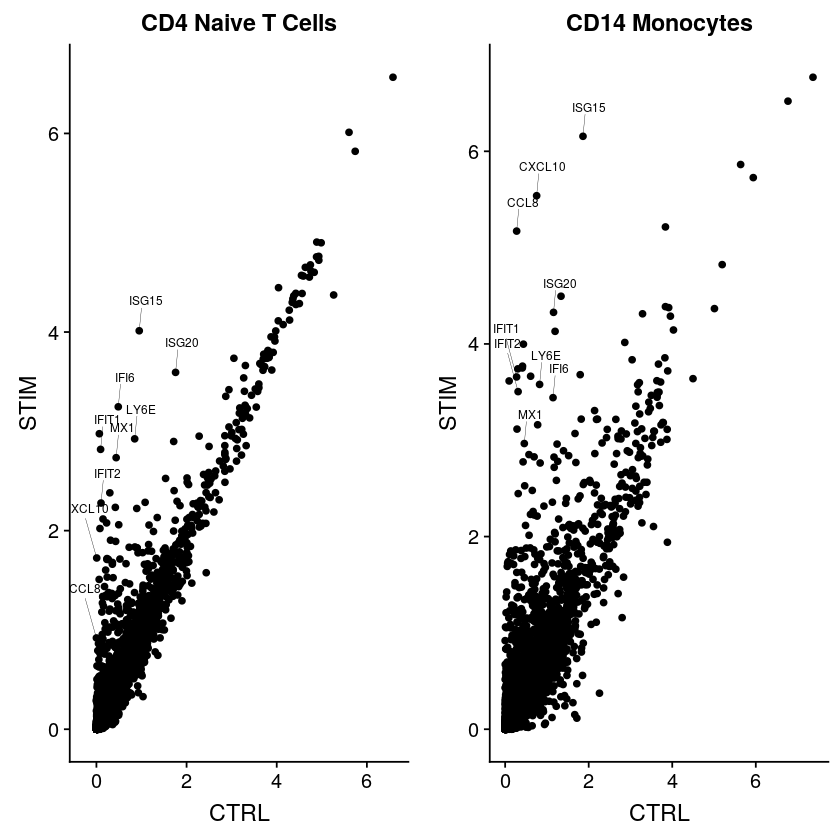

In [16]:
t.cells <- SubsetData(immune.combined, ident.use = "CD4 Naive T", subset.raw = T)
t.cells <- SetAllIdent(t.cells, id = "stim")
avg.t.cells <- log1p(AverageExpression(t.cells, show.progress = FALSE))
avg.t.cells$gene <- rownames(avg.t.cells)

cd14.mono <- SubsetData(immune.combined, ident.use = "CD14 Mono", subset.raw = T)
cd14.mono <- SetAllIdent(cd14.mono, id = "stim")
avg.cd14.mono <- log1p(AverageExpression(cd14.mono, show.progress = FALSE))
avg.cd14.mono$gene <- rownames(avg.cd14.mono)

genes.to.label1 = c("ISG15", "LY6E", "IFI6", "ISG20", "MX1")
genes.to.label2 = c("IFIT2", "IFIT1")
genes.to.label3 = c("CXCL10", "CCL8")
p1 <- ggplot(avg.t.cells, aes(CTRL, STIM)) + geom_point() + ggtitle("CD4 Naive T Cells")
p1 <- LabelUR(p1, genes = c(genes.to.label1, genes.to.label2), avg.t.cells, 
    adj.u.t = 0.3, adj.u.s = 0.23)
p1 <- LabelUL(p1, genes = genes.to.label3, avg.t.cells, adj.u.t = 0.5, adj.u.s = 0.4, 
    adj.l.t = 0.25, adj.l.s = 0.25)
p2 <- ggplot(avg.cd14.mono, aes(CTRL, STIM)) + geom_point() + ggtitle("CD14 Monocytes")
p2 <- LabelUR(p2, genes = c(genes.to.label1, genes.to.label3), avg.cd14.mono, 
    adj.u.t = 0.3, adj.u.s = 0.23)
p2 <- LabelUL(p2, genes = genes.to.label2, avg.cd14.mono, adj.u.t = 0.5, adj.u.s = 0.4, 
    adj.l.t = 0.25, adj.l.s = 0.25)
plot_grid(p1, p2)


In [17]:
immune.combined@meta.data$celltype.stim <- paste0(immune.combined@ident, "_", 
    immune.combined@meta.data$stim)
immune.combined <- StashIdent(immune.combined, save.name = "celltype")
immune.combined <- SetAllIdent(immune.combined, id = "celltype.stim")
b.interferon.response <- FindMarkers(immune.combined, ident.1 = "B_STIM", ident.2 = "B_CTRL", 
    print.bar = FALSE)
head(b.interferon.response, 15)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
ISG15,1.507485e-166,3.2430775,0.998,0.235,2.118469e-162
IFIT3,1.197089e-160,3.1181217,0.960,0.051,1.682269e-156
IFI6,6.168886e-158,2.9295219,0.959,0.078,8.669135e-154
ISG20,1.915755e-156,2.0416453,1.000,0.664,2.692210e-152
IFIT1,5.639346e-146,2.8623180,0.905,0.030,7.924973e-142
MX1,8.264417e-131,2.2634637,0.912,0.122,1.161398e-126
LY6E,8.874270e-126,2.1880659,0.893,0.143,1.247101e-121
IFIT2,3.854507e-116,2.5589116,0.793,0.037,5.416739e-112
TNFSF10,1.053693e-113,2.6153254,0.769,0.021,1.480755e-109
B2M,4.751051e-104,0.4375721,1.000,1.000,6.676652e-100


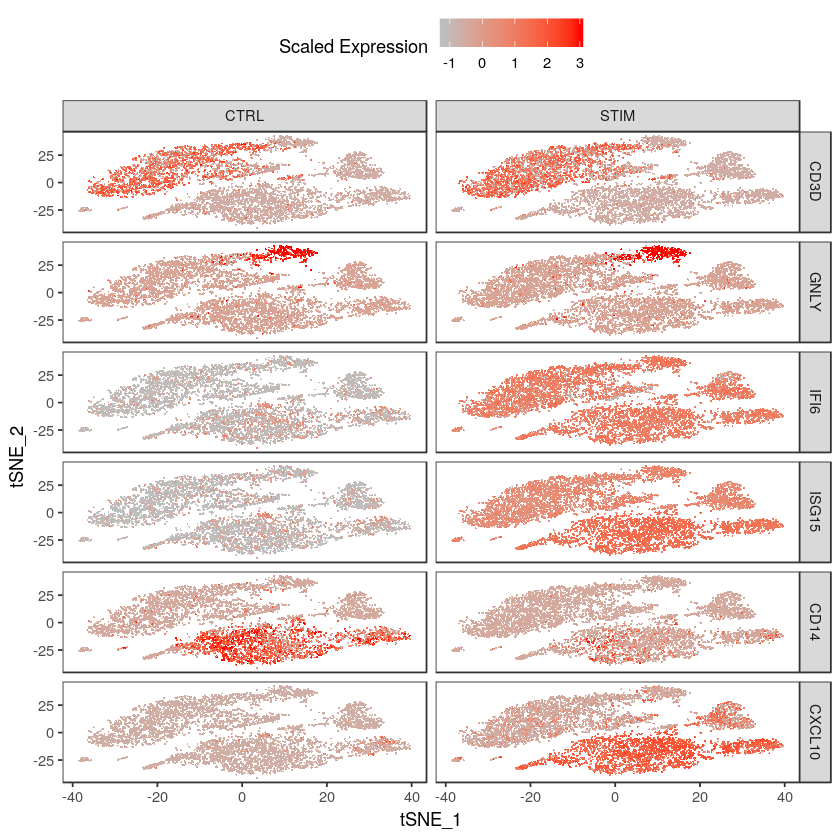

In [18]:
FeatureHeatmap(immune.combined, features.plot = c("CD3D", "GNLY", "IFI6", "ISG15", 
    "CD14", "CXCL10"), group.by = "stim", pt.size = 0.25, key.position = "top", 
    max.exp = 3)

In [19]:
saveRDS(immune.combined, file = "immune_combined.rds")